In [ ]:
import pandas as pd
import numpy as np
import json

pd.options.display.max_columns=999

def load_json_data(filename):
    
    with open(filename, 'r') as f:
        data = f.read()
        data.replace("}}", "}").replace('"properties":{', '')
#     parsed_data = [parse_line(line) for line in data]
    return pd.DataFrame(json.loads("[" + data + "]"))
    
#     data = map(lambda x: x.rstrip(), data)
#     data_json_str = "[" + ','.join(data) + "]"
#     data_df = pd.read_json(data)
#     data_df.properties = data_df.properties.apply(json.dumps)
#     return data_df

def parse_line(line):
    line = json.loads("[" + line + "]")
    return pd.Series(line[0])

def subset_event(df, event_name=None):
    """
    Available events: zip(list(data_df.event.value_counts().index), data_df.event.value_counts().values)
    """
    if event_name:
        df = df[df.event == event_name]
    event_features = df.properties.values
    event_features = map(lambda x: x.rstrip(), event_features)
    data_json_str_event_features = "[" + ','.join(event_features) + "]"
    event_df = pd.read_json(data_json_str_event_features)
    return event_df


In [ ]:
def load_json_data(filename):
    with open(filename,'r') as infile:
        d = (parse_line(line) for line in infile)
        return pd.DataFrame(d)


def parse_line(line):
    line = json.loads(line)
    return pd.Series(line['properties'])

In [ ]:
df = load_json_data('test_mp.json')

In [ ]:
df.info()

In [ ]:
data_df = load_json_data('test_mp.json')

In [ ]:
data_df.head()

In [ ]:
data_df = load_json_data('jun-15-16.json')

In [1]:
def load_json_data(filename):
    with open(filename, 'rb') as f:
        data = f.readlines()
    data = map(lambda x: x.rstrip(), data)
    data_json_str = "[" + ','.join(data) + "]"
    data_df = pd.read_json(data_json_str)
    data_df.properties = data_df.properties.apply(json.dumps)
    return data_df

def subset_event(df, event_name=None):
    """
    Available events: zip(list(data_df.event.value_counts().index), data_df.event.value_counts().values)
    """
    if event_name:
        df = df[df.event == event_name]
    event_features = df.properties.values
    event_features = map(lambda x: x.rstrip(), event_features)
    data_json_str_event_features = "[" + ','.join(event_features) + "]"
    event_df = pd.read_json(data_json_str_event_features)
    return event_df

In [3]:
import pandas as pd
import numpy as np
import json

pd.options.display.max_columns=999

df = load_json_data('purchases.json')

In [16]:
event_features = df.properties.values
event_features = map(lambda x: x.rstrip(), event_features)
data_json_str_event_features = "[" + ','.join(event_features) + "]"
event_df = pd.read_json(data_json_str_event_features)

In [22]:
event_df.columns

Index([u'$app_release', u'$app_version', u'$browser', u'$carrier', u'$city',
       u'$device', u'$email', u'$experiments', u'$first_name', u'$import',
       u'$initial_referrer', u'$initial_referring_domain', u'$ios_ifa',
       u'$last_name', u'$lib_version', u'$manufacturer', u'$model', u'$name',
       u'$os', u'$os_version', u'$radio', u'$referrer', u'$referring_domain',
       u'$region', u'$screen_height', u'$screen_width', u'$search_engine',
       u'$watch_model', u'$wifi', u'Experiment: Artist Premium Plans',
       u'Experiment: Artwork Layout', u'Experiment: Buy Button Style',
       u'Experiment: Checkout', u'Experiment: Daily Art Newsletter Modal',
       u'Experiment: Feature Collection Carousel',
       u'Experiment: Featured Collection Carousel v Single',
       u'Experiment: First Look', u'Experiment: First Look Monthly',
       u'Experiment: Hide mobile landing', u'Experiment: Home Themes Hover',
       u'Experiment: Mobile Landing', u'Experiment: Pin Banner See on 

In [23]:
#'id'
relevant = ['User Type', 'artworks favorited', 'artworks seen', 'artworks shared', 'favorites', 'follows', 'gender', \
            'price', 'session count', 'total artists followed', 'total artworks favorited',
       'total artworks shared', 'total favorites', 'total follows',
       'total number purchases', 'total purchase dollars',
       'total purchases', 'total referrals sent']

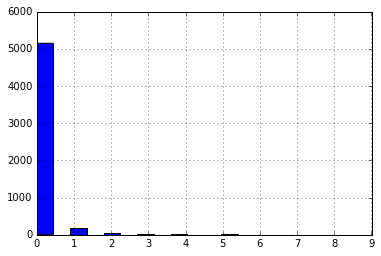

In [30]:
%matplotlib inline
dfp['artists followed'].hist(bins=20)

In [33]:
for i in relevant:
    print i
    print dfp[i].value_counts()
    print

User Type
Organic                 994
Logged in with email    258
Logged in with FB       187
Not logged in            32
Name: User Type, dtype: int64

artworks favorited
0.0     5206
1.0       89
2.0       45
4.0       33
3.0       20
5.0       19
6.0       12
9.0        7
11.0       7
7.0        5
13.0       5
8.0        4
10.0       2
14.0       2
15.0       2
17.0       2
35.0       1
16.0       1
19.0       1
23.0       1
31.0       1
63.0       1
Name: artworks favorited, dtype: int64

artworks seen
0.0       3382
1.0        148
2.0         94
3.0         52
6.0         52
4.0         48
5.0         46
7.0         44
11.0        37
13.0        33
16.0        31
14.0        30
17.0        29
10.0        27
12.0        27
9.0         26
8.0         24
28.0        23
21.0        22
18.0        21
20.0        19
25.0        18
29.0        18
22.0        16
31.0        16
26.0        16
36.0        15
39.0        15
35.0        15
23.0        15
          ... 
374.0        1
375.0   

In [42]:
for i in relevant:
    print i, dfp[i].count(), dfp[i].count()/5575.

User Type 1471 0.263856502242
artworks favorited 5466 0.980448430493
artworks seen 5466 0.980448430493
artworks shared 5466 0.980448430493
favorites 66 0.0118385650224
follows 66 0.0118385650224
gender 1651 0.296143497758
price 24 0.00430493273543
session count 5466 0.980448430493
total artists followed 4858 0.871390134529
total artworks favorited 4858 0.871390134529
total artworks shared 4858 0.871390134529
total favorites 2689 0.482331838565
total follows 2689 0.482331838565
total number purchases 2574 0.461704035874
total purchase dollars 2574 0.461704035874
total purchases 46 0.00825112107623
total referrals sent 4858 0.871390134529


In [50]:
dfp['total purchases'].value_counts()

0.0    40
1.0     6
Name: total purchases, dtype: int64

In [39]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 0 to 5574
Data columns (total 97 columns):
$app_release                                         5466 non-null object
$app_version                                         5466 non-null object
$browser                                             109 non-null object
$carrier                                             4737 non-null object
$city                                                4718 non-null object
$device                                              10 non-null object
$email                                               2755 non-null object
$experiments                                         659 non-null object
$first_name                                          583 non-null object
$import                                              35 non-null float64
$initial_referrer                                    109 non-null object
$initial_referring_domain                            109 non-null object
$ios_ifa     

In [52]:
dfp['']

,$app_release,$app_version,$browser,$carrier,$city,$device,$email,$experiments,$first_name,$import,$initial_referrer,$initial_referring_domain,$ios_ifa,$last_name,$lib_version,$manufacturer,$model,$name,$os,$os_version,$radio,$referrer,$referring_domain,$region,$screen_height,$screen_width,$search_engine,$watch_model,$wifi,Experiment: Artist Premium Plans,Experiment: Artwork Layout,Experiment: Buy Button Style,Experiment: Checkout,Experiment: Daily Art Newsletter Modal,Experiment: Feature Collection Carousel,Experiment: Featured Collection Carousel v Single,Experiment: First Look,Experiment: First Look Monthly,Experiment: Hide mobile landing,Experiment: Home Themes Hover,Experiment: Mobile Landing,Experiment: Pin Banner See on Wall,Experiment: Popular Landing,Experiment: Premium Monthly / Yearly,Experiment: Spring Collection,Experiment: T-shirt,Experiment: Tshirt Referral,Experiment: Vango Pop Up,User Type,app version,art distance,art size,artists followed,artworks cart,artworks detail,artworks favorited,artworks seen,artworks shared,category,device,distinct_id,elapsed seconds,favorites,favorites viewed,first_name,follows,gender,id,installed,last favorited artwork date,last followed artist date,last purchase date,location,mp_country_code,mp_device_model,mp_lib,price,screen width,session count,sessions,since last event,time,total artists followed,total artworks favorited,total artworks shared,total favorites,total follows,total number purchases,total purchase dollars,total purchases,total referrals sent,user id,utm_campaign,utm_content,utm_medium,utm_source,utm_term
0,3.3.0,330,NaN,NaN,Omaha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292F6304-1DD8-45AC-B10F-712F4C5C2A81,NaN,2.0.4,Apple,"iPad3,4",NaN,iPhone OS,7.0.4,NaN,NaN,NaN,Nebraska,1024,768,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not logged in,NaN,8.0,large,NaN,1.0,NaN,0.0,1.0,0.0,NaN,NaN,EA09B421-D95E-4CE6-BC2C-58B507F46AA0,271.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"iPad3,4",iphone,NaN,NaN,2.0,NaN,103.0,1393274858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.4.0,333,NaN,NaN,San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96900464-63A2-4E6A-B0B3-727383BF6CAB,NaN,2.0.4,Apple,"iPad3,1",NaN,iPhone OS,7.0.6,NaN,NaN,NaN,California,1024,768,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged in with FB,NaN,12.0,medium,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,96900464-63A2-4E6A-B0B3-727383BF6CAB,221.0,NaN,0.0,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,"San Francisco, California",US,"iPad3,1",iphone,NaN,NaN,38.0,NaN,84.0,1393281353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.3.0,330,NaN,AT&T,Towson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81AB0858-F24C-46E4-957E-BEAD3F3C6CAE,NaN,2.0.4,Apple,"iPad2,2",NaN,iPhone OS,7.0.6,NaN,NaN,NaN,Maryland,1024,768,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not logged in,NaN,12.0,medium,NaN,2.0,NaN,0.0,10.0,0.0,NaN,NaN,81AB0858-F24C-46E4-957E-BEAD3F3C6CAE,201.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"iPad2,2",iphone,NaN,NaN,4.0,NaN,106.0,1393830575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.4.0,335,NaN,NaN,Fort Mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6F8CECBB-64E3-4CC6-BB32-049B68968214,NaN,2.0.4,Apple,"iPad3,1",NaN,iPhone OS,7.0.6,NaN,NaN,NaN,South Carolina,1024,768,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged in with email,NaN,12.0,large,NaN,1.0,NaN,3.0,258.0,0.0,NaN,NaN,6F8CECBB-64E3-4CC6-BB32-049B68968214,1061.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"iPad3,1",iphone,NaN,NaN,2.0,NaN,147.0,1394166843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.4.0,335,NaN,Verizon,Long Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8E42F2F7-3968-4D11-9CCB-2C00513F461C,NaN,2.0.4,Apple,"iPad2,7",NaN,iPhone OS,7.0.6,NaN,NaN,NaN,California,1024,768,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logged in with 